# Análise Exploratória

In [2]:
!pip install -U scikit-learn imbalanced-learn
#Baixando bibliotecas

#Passo 1 - Importar os pacotes e bibliotecas que serão utilizados!

#Manipulação de Tratamento dos Dados:
import numpy as np
import pandas as pd
import time #(Utilizado para funções de tempo)
import matplotlib.pyplot as plt #(Utilizado para Gráficos)
import seaborn as sns #(Utilizado para Gráficos)


#Bibliotecas do Skit Learn
from sklearn.model_selection import train_test_split #Separar dados para treino e teste
from sklearn.preprocessing import StandardScaler #Fazer Padronização dos dados
from sklearn.preprocessing import LabelEncoder #Fazer o OneHotEncoding
from sklearn.metrics import accuracy_score #Avaliar Acurácia do modelo preditivo
from sklearn.neighbors import KNeighborsClassifier #Algoritmo para criação do modelo
from imblearn import under_sampling, over_sampling #Fazer Balanceamento de dados
from imblearn.over_sampling import SMOTE #Balanceamento de dados

#Remover avisos de alerta
import warnings
warnings.filterwarnings("ignore")

#Para nao limitar a exibição do DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

### Coleta de Dados:

In [3]:
df_original = pd.read_csv("dados.csv", sep = ';')

### Começo da Análise Exploratória:

In [4]:
df_original.shape
#448 mil infos
#24 variáveis

(448447, 24)

In [5]:
df_original.head()
#Ver as 5 primeiras linhas

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48 Meses,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48 Meses,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0
3,4,Vendedor,26,FEMININO,17.0,25/06/2019,NaN,757,25,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,1,4,0,0,230,265,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0


In [7]:
df_original.info()
#informações sobre o tipo das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448447 entries, 0 to 448446
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID_CLIENTE                   448447 non-null  int64  
 1   FORMA_AQUISICAO              448447 non-null  object 
 2   IDADE_CLIENTE                448447 non-null  int64  
 3   SEXO                         448447 non-null  object 
 4   QT_FILHOS                    448193 non-null  float64
 5   DT_AQUISICAO                 448447 non-null  object 
 6   DT_CANCELAMENTO              117455 non-null  object 
 7   DIAS_ATIVO                   448447 non-null  int64  
 8   MESES_ATIVO                  448447 non-null  int64  
 9   DURACAO_CONTRATO             448447 non-null  object 
 10  VL_PLANO_ADESAO              448447 non-null  int64  
 11  VL_PLANO_ATUAL               448447 non-null  int64  
 12  NOME_PRODUTO                 448447 non-null  object 
 13 

In [8]:
#Período dos dados coletados
inicio = pd.to_datetime(df_original['DT_AQUISICAO']).dt.date.min()
fim = pd.to_datetime(df_original['DT_AQUISICAO']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até', fim)

Período dos dados - De: 2001-01-01 Até 2021-06-29


In [9]:
#Resumo estatistíco
df_original.describe()

,ID_CLIENTE,IDADE_CLIENTE,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,COD_SITUACAO
count,448447.000000,448447.000000,448193.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000
mean,224224.000000,38.891140,1.526385,483.857783,15.772457,303.769386,349.798596,1.625269,3.917281,1.019175,0.563596,3.353685,0.188029,337.364498,303.769386,349.798596,0.261915
std,129455.642421,6.682351,0.504288,373.649523,12.252344,113.612746,130.560943,0.579956,1.460079,1.474442,0.886314,1.586924,0.423095,525.953927,113.612746,130.560943,0.439677
min,1.000000,23.000000,0.000000,22.000000,1.000000,230.000000,265.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,230.000000,265.000000,0.000000
25%,112112.500000,35.000000,1.000000,167.000000,5.000000,230.000000,265.000000,1.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,230.000000,265.000000,0.000000
50%,224224.000000,40.000000,2.000000,329.000000,11.000000,230.000000,265.000000,2.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,230.000000,265.000000,0.000000
75%,336335.500000,43.000000,2.000000,798.000000,26.000000,350.000000,403.000000,2.000000,5.000000,2.000000,1.000000,5.000000,0.000000,794.000000,350.000000,403.000000,1.000000
max,448447.000000,55.000000,25.000000,1296.000000,42.000000,600.000000,690.000000,3.000000,100.000000,38.000000,17.000000,100.000000,5.000000,16043.000000,600.000000,690.000000,1.000000


In [10]:
#PASSO IMPORTANTE!
#Verificando se há valores missing
print(df_original.isna().sum())
#ISNA = IS NAN = É NAN(NULO)

#QT_FILHOS TEM 254 VALORES EM BRANCO
#DT CANCELAMENTO É NORMAL NÃO TER

ID_CLIENTE                          0
FORMA_AQUISICAO                     0
IDADE_CLIENTE                       0
SEXO                                0
QT_FILHOS                         254
DT_AQUISICAO                        0
DT_CANCELAMENTO                330992
DIAS_ATIVO                          0
MESES_ATIVO                         0
DURACAO_CONTRATO                    0
VL_PLANO_ADESAO                     0
VL_PLANO_ATUAL                      0
NOME_PRODUTO                        0
QT_PONTOS_INSTALADOS                0
QT_PC_PAGAS                         0
QT_PC_VENCIDAS                      0
QT_PC_PAGA_ATRASO                   0
QT_PC_PAGA_EM_DIA                   0
QT_ACORDO_PAGAMENTO                 0
VL_MENSALIDADE_ATRASO               0
VL_MENSALIDADE_DT_AQUISICAO         0
VL_MENSALIDADE_DT_ATUAL             0
SITUACAO                            0
COD_SITUACAO                        0
dtype: int64


In [11]:
#Verificando valores únicos
df_original.nunique()

#(BOM PARA VER VARIÁVEIS CATEGÓRICAS E NUMÉRICAS)

ID_CLIENTE                     448447
FORMA_AQUISICAO                     2
IDADE_CLIENTE                      33
SEXO                                2
QT_FILHOS                           7
DT_AQUISICAO                     5888
DT_CANCELAMENTO                  5304
DIAS_ATIVO                       1051
MESES_ATIVO                        42
DURACAO_CONTRATO                    4
VL_PLANO_ADESAO                     6
VL_PLANO_ATUAL                      6
NOME_PRODUTO                        6
QT_PONTOS_INSTALADOS                3
QT_PC_PAGAS                        31
QT_PC_VENCIDAS                     31
QT_PC_PAGA_ATRASO                   9
QT_PC_PAGA_EM_DIA                  30
QT_ACORDO_PAGAMENTO                 6
VL_MENSALIDADE_ATRASO              80
VL_MENSALIDADE_DT_AQUISICAO         6
VL_MENSALIDADE_DT_ATUAL             6
SITUACAO                            2
COD_SITUACAO                        2
dtype: int64

## Analisando Variáveis Categóricas

-> Forma_Aquisicao, sexo, duracao_contrato, nome_produto, situacao

In [12]:
#Agrupar valores da variável
df_original.groupby(['FORMA_AQUISICAO']).size()


#Possível ver que existe apenas 2: SITE OU VENDEDOR

FORMA_AQUISICAO
Site        321376
Vendedor    127071
dtype: int64

In [13]:
df_original.groupby(['SEXO']).size()

#Apenas 2: MASCULINO OU FEMININO

SEXO
FEMININO     224223
MASCULINO    224224
dtype: int64

In [14]:
df_original.groupby(['DURACAO_CONTRATO']).size()

# 4 TIPOS: 12 MESES / 24 MESES / 36 MESES / 48 MESES 

DURACAO_CONTRATO
12 Meses       195
24 Meses       235
36 Meses     31889
48 Meses    416128
dtype: int64

In [15]:
df_original.groupby(['NOME_PRODUTO']).size()

#6 NOMES PARA CADA 'PLANO'

NOME_PRODUTO
PLANO BASICO (30 CANAIS HD)         285209
PLANO BASICO PLUS (50 CANAIS HD)      8835
PLANO FAMILIA (100 CANAIS HD)        59716
PLANO MEDIO A (60 CANAIS HD)         62221
PLANO MEDIO TOP (90 CANAIS HD)         295
PLANO PREMIUM TOTAL                  32171
dtype: int64

In [16]:
df_original.groupby(['SITUACAO']).size()

#OU ESTÁ ATIVO OU CANCELADO

SITUACAO
ATIVO        330992
CANCELADO    117455
dtype: int64

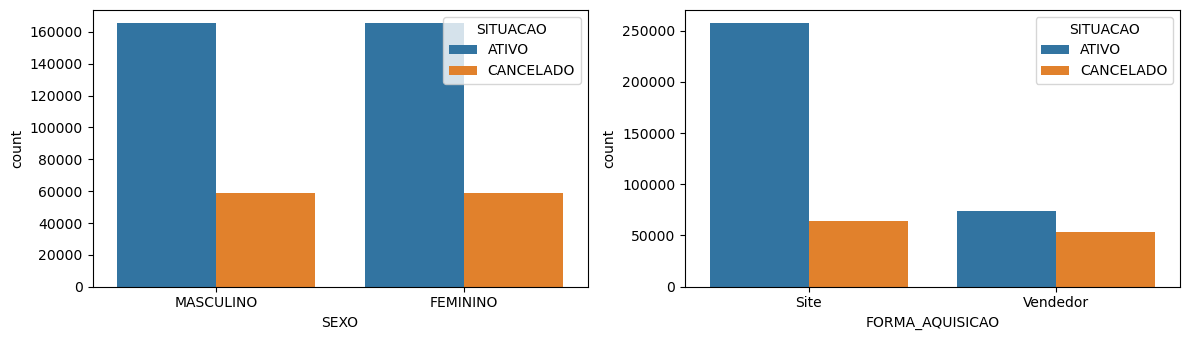

In [17]:
# Analisando o gráfico da variavel FORMA_AQUISICAO e SEXO comparadas a variável ALVO
#Podemos constatar na analise que não há discrepancias nestas variaveis

plt.rcParams["figure.figsize"] = [12.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(data = df_original, x = "SEXO", hue = "SITUACAO", ax=axes[0])
sns.countplot(data = df_original, x = "FORMA_AQUISICAO", hue = "SITUACAO", ax=axes[1])
plt.show()

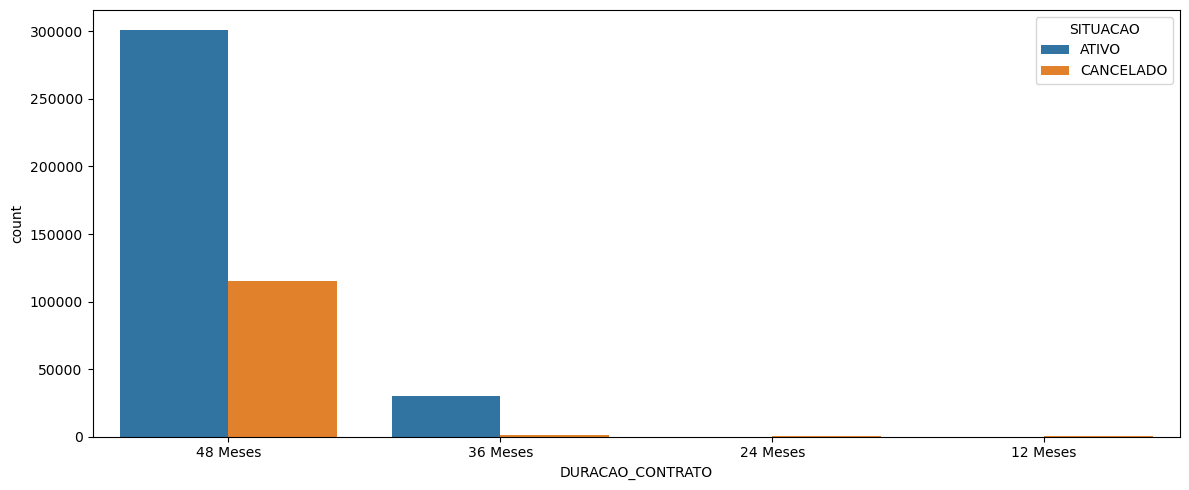

In [18]:
# Analisando o gráfico da variavel DURACAO_CONTRATO comparadas a variável ALVO
#Podemos constatar na analise que não há discrepancias nestas variaveis
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = df_original, x = "DURACAO_CONTRATO", hue = "SITUACAO")
plt.show()

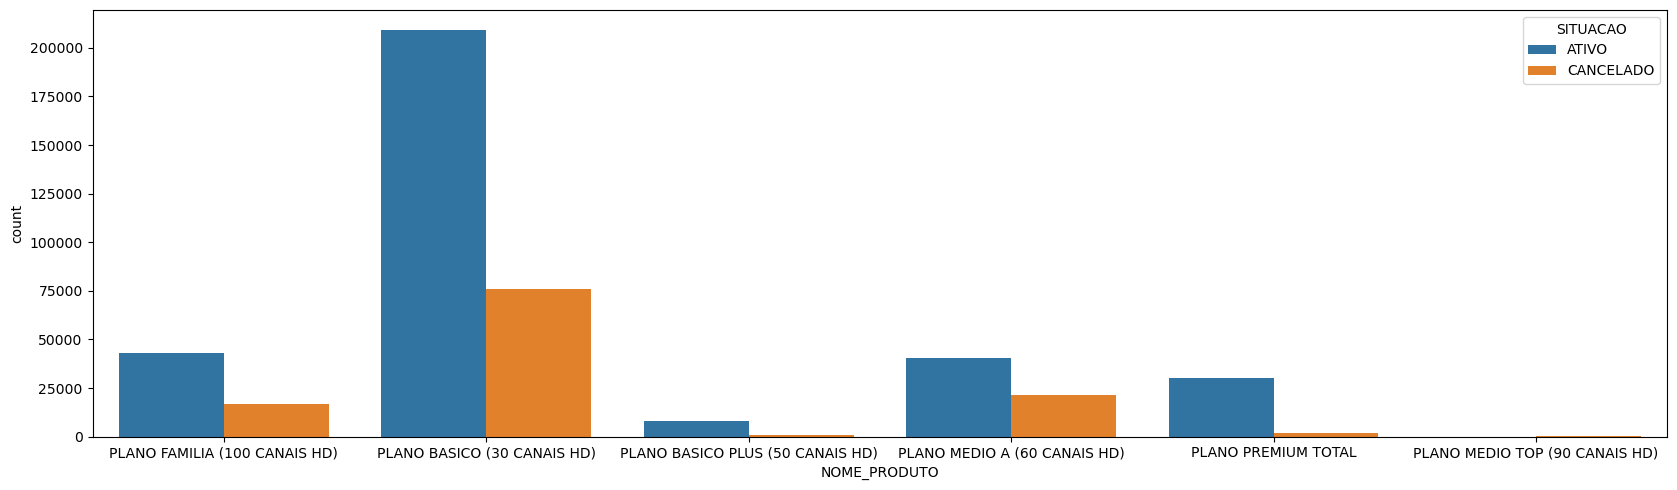

In [19]:
# Analisando o gráfico da variavel NOME_PRODUTO comparadas a variável ALVO
#Podemos constatar na analise que não há discrepancias nestas variaveis
plt.rcParams["figure.figsize"] = [17.00, 5.00]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = df_original, x = "NOME_PRODUTO", hue = "SITUACAO")
plt.show()

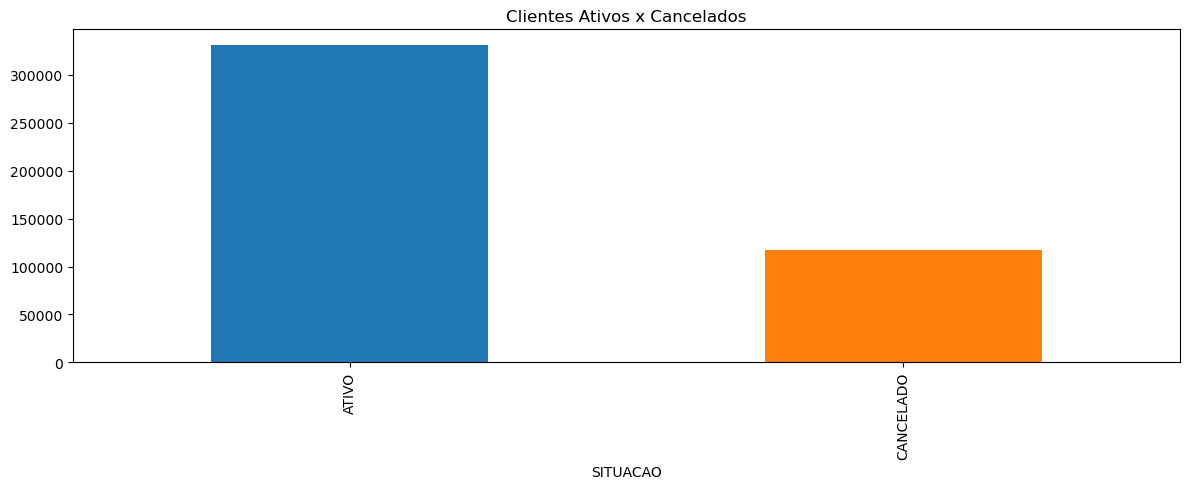

In [20]:
#Analisando como a variavel alvo está distribuida.
#Aqui podemos observar que há muito mais CLIENTES ATIVOS do que CLIENTES CANCELADOS
#dessa forma, precisaremos balancear o dataset na etapa 2 - Tratamento de Dados.
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
df_original.SITUACAO.value_counts().plot(kind='bar', title='Clientes Ativos x Cancelados',color = ['#1F77B4', '#FF7F0E']);

## Analisando Variáveis Numéricas
(Muito mais numérica doque categórica)

In [22]:
# Carregar variaveis para plot
# Pegaremos a partir da variavel 1 porque o ID_CLIENTE não iremos utilizar
variaveis_numericas = []
for i in df_original.columns[1:24].tolist():
        if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':            
            print(i, ':' , df_original.dtypes[i]) 
            variaveis_numericas.append(i)    

IDADE_CLIENTE : int64
QT_FILHOS : float64
DIAS_ATIVO : int64
MESES_ATIVO : int64
VL_PLANO_ADESAO : int64
VL_PLANO_ATUAL : int64
QT_PONTOS_INSTALADOS : int64
QT_PC_PAGAS : int64
QT_PC_VENCIDAS : int64
QT_PC_PAGA_ATRASO : int64
QT_PC_PAGA_EM_DIA : int64
QT_ACORDO_PAGAMENTO : int64
VL_MENSALIDADE_ATRASO : int64
VL_MENSALIDADE_DT_AQUISICAO : int64
VL_MENSALIDADE_DT_ATUAL : int64
COD_SITUACAO : int64


In [23]:
len(variaveis_numericas)

#temos 16 variaveis numericas

16

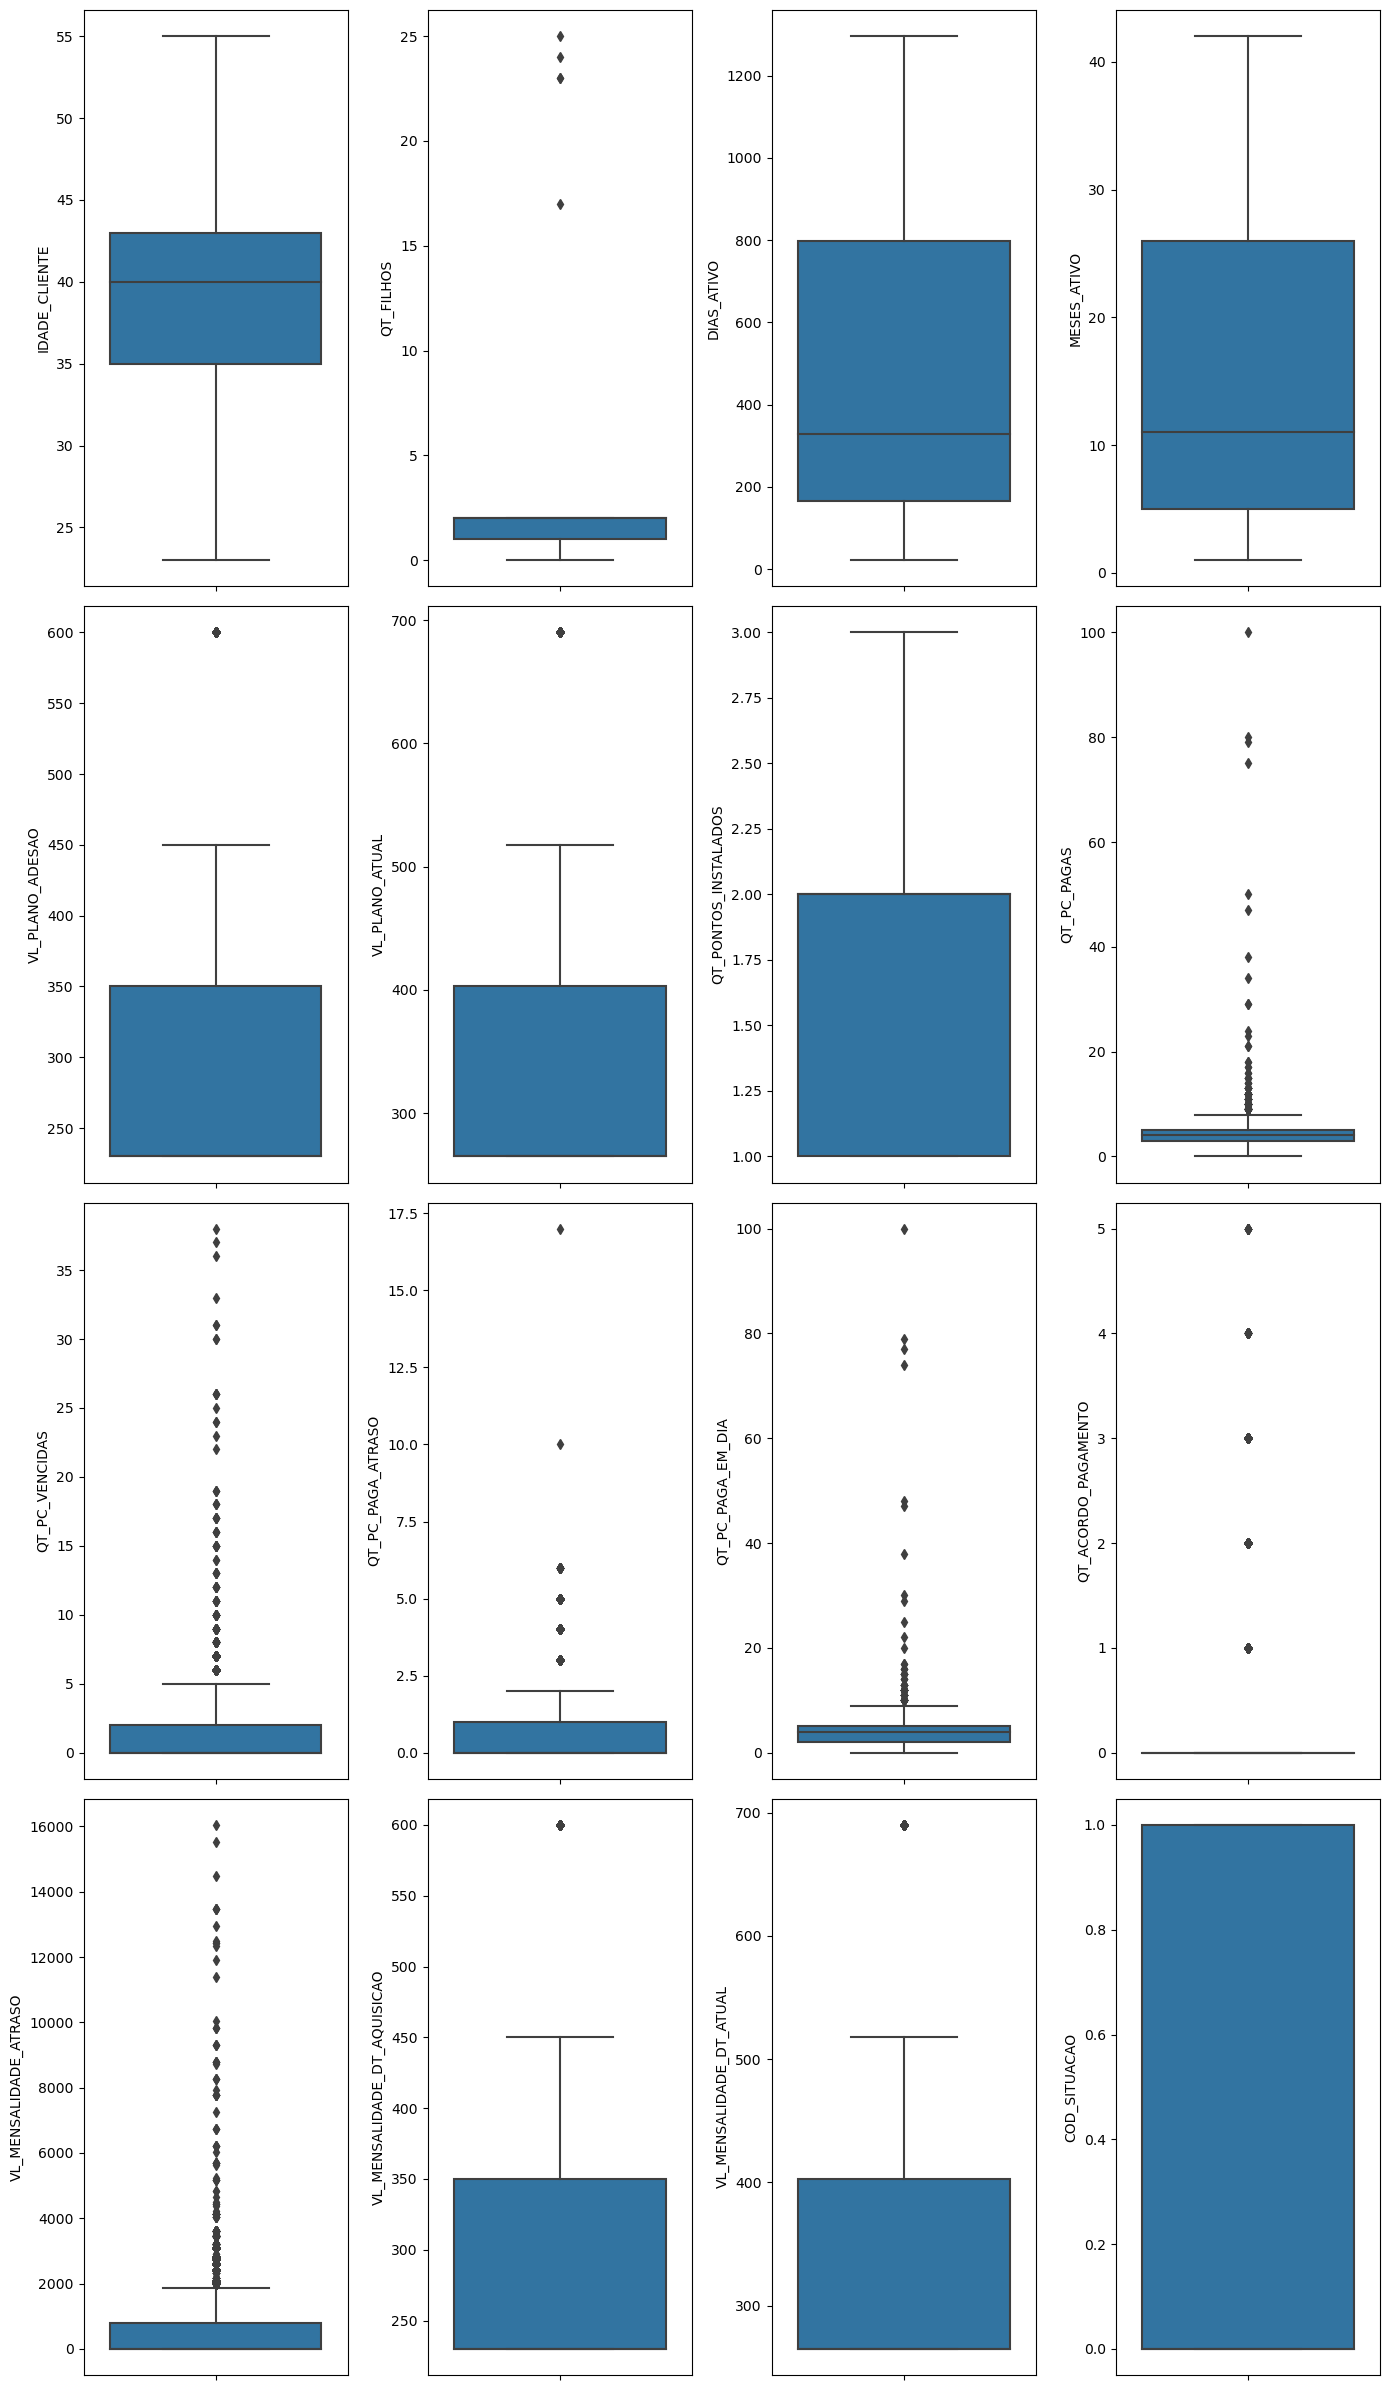

In [24]:
#Podemos observar nos boxplots abaixo que algumas variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 24.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 4) #4 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_original, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show()

In [25]:
#Gráficos acima mostra 20 filhos (Pode ser Outlier)

In [26]:
# A Variavel QT_PC_PAGA_EM_DIA e QT_PC_PAGAS possui um número maior que o prazo máximo do contrato, por isso podemos constatar 
# que foi algum erro dos dados gerando este OUTLIER e iremos trata-los considerando o número máximo do prazo do contrato

# A Variavel QT_FILHOS também possui alguns OUTLIERS como por exemplo, 17, 23 e 24 filhos. Vamos avaliar a quantidade
# desses dados e verificar como iremos trata-los.

In [27]:
# Temos apenas 5 registros dentro de um volume de mais de 440 mil registros, dessa forma iremos exclui-los pois não irá causar
# impacto de perda de dados, pois a quantidade é muito pequena comparada ao total de registros.
df_original.groupby(['QT_FILHOS']).size()

QT_FILHOS
0.0         10
1.0     212353
2.0     235825
17.0         1
23.0         2
24.0         1
25.0         1
dtype: int64

In [28]:
#25 filhos?

In [29]:
#Quem são esses registros?
df_original.loc[df_original['QT_FILHOS'] > 2]

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
3,4,Vendedor,26,FEMININO,17.0,25/06/2019,NaN,757,25,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,1,4,0,0,230,265,ATIVO,0
91,92,Vendedor,48,FEMININO,23.0,03/08/2018,NaN,1083,35,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
164,165,Vendedor,55,MASCULINO,23.0,19/06/2018,NaN,1128,37,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,2,3,1,0,230,265,ATIVO,0
273,274,Vendedor,32,FEMININO,24.0,02/05/2018,NaN,1176,38,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,2,3,1,0,230,265,ATIVO,0
454,455,Vendedor,38,MASCULINO,25.0,04/09/2018,NaN,1051,34,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,1,0,230,265,ATIVO,0
